In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\age_group.xlsx",index_col=False, sheet_name='age_group_comb')

In [25]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
df1=df[['covid_cases','suicide_deaths']]

In [20]:
def clean_dataset(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [21]:
clean_dataset(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_12628\2934779625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,covid_cases,suicide_deaths
396,140794.0,25.5
397,56072.0,19.3
398,56072.0,20.6
399,45457.0,18.5
400,45457.0,14.4
...,...,...
1283,38731.0,31.4
1284,13592.0,34.3
1285,9220.0,0.0
1286,9220.0,0.0


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 396 to 1287
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   covid_cases     774 non-null    float64
 1   suicide_deaths  774 non-null    float64
dtypes: float64(2)
memory usage: 18.1 KB


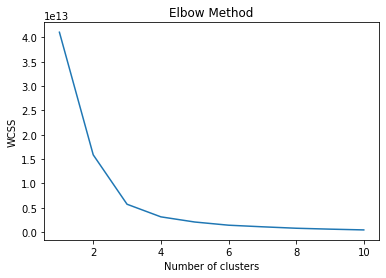

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-41048865681041.29,
 -15871422704855.64,
 -5727044485898.621,
 -3138479183639.9326,
 -2079824615218.0645,
 -1425958467695.7996,
 -1086171469930.8877,
 -799985048408.2817,
 -613456408934.2181]

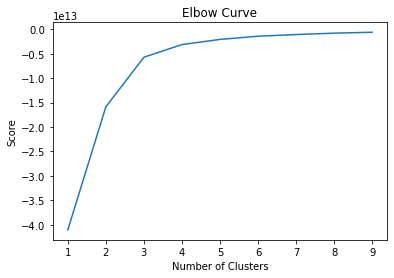

In [28]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [33]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=4)

In [35]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_12628\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [36]:
df1.head()

,covid_cases,suicide_deaths,clusters
396,140794.0,25.5,3
397,56072.0,19.3,0
398,56072.0,20.6,0
399,45457.0,18.5,0
400,45457.0,14.4,0


In [37]:
df1['clusters'].value_counts()

0    529
3    179
2     52
1     14
Name: clusters, dtype: int64

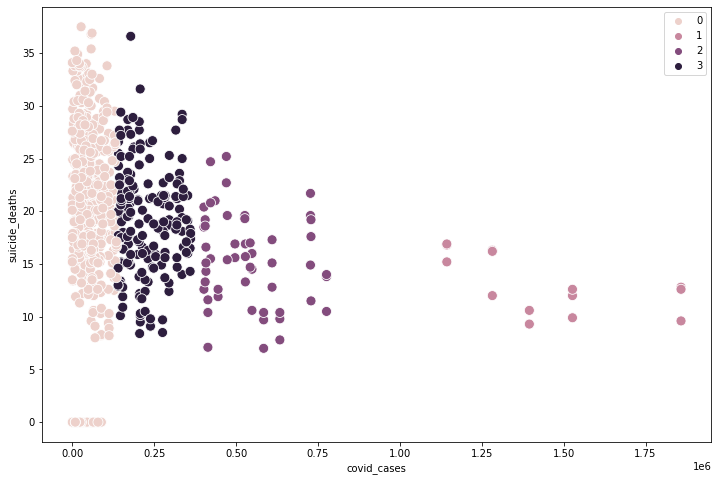

In [42]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['covid_cases'], y=df1['suicide_deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('covid_cases') # Label x-axis.
plt.ylabel('suicide_deaths') # Label y-axis.
plt.show()

In [44]:
plt.savefig(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\04 Analysis\age_group_cluster.png")

<Figure size 432x288 with 0 Axes>

In [39]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'black'

C:\Users\drmat\AppData\Local\Temp\ipykernel_12628\1556603742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [41]:
df1.groupby('cluster').agg({'covid_cases':['mean', 'median'],'suicide_deaths':['mean', 'median']})

covid_cases            suicide_deaths       
                     mean     median           mean median
cluster                                                   
black        2.261747e+05   207574.0      19.092737  19.10
dark purple  5.367347e+05   527567.0      15.390385  15.25
pink         4.674349e+04    39706.0      16.893573  19.20
purple       1.444606e+06  1395388.0      13.057143  12.60